# Investigating Orbits in Various Gravitational Potentials

## Objective

This project delves into the exploration of orbits under different gravitational potentials, ranging from smaller scales to galactic scales. The focus is on analyzing the trajectories of test particles, representing celestial bodies like planets or stars.

## Approach

The strategy involves solving the differential equation of motion by employing the fundamental `Euler Method` & `Runge-kutta 4th Order` to iteratively compute the subsequent steps in time. Detailed descriptions of the gravitational potentials and their effects are provided in the accompanying `Report *.pdf`.

Below are the Python scripts encompassed in this project:

1. Keplerian Potential of the first 6 planets, considering inter-gravitational forces.
2. Spherical Harmonic Potential of the first 6 planets, incorporating inter-gravitational forces.
3. Isochrone Potential of the first 6 planets, accounting for inter-gravitational forces.
4. Keplerian potential of Earth using spherical coordinates.
5. Tube orbit in an axisymmetric potential with a flattened logarithmic potential.
6. Razor-thin disk modeled by the Kuzmin Model.
7. Thickened Disk represented by the Miyamoto Nagai Model.
8. Velocity Profile analysis for Kepler, Thick disk, and Razor thin disk Potentials.
9. 2D(x-y) Barred Potential
10. Velocity-pattern profile for Barred-Galaxies

## Insights

My knowledge underscores the significance of numerical methods, such as the Euler Method & Runge-Kutta, in solving differential equations for simulating dynamic systems. Understanding the behavior of celestial bodies in diverse gravitational potentials contributes to unraveling the mysteries of astrophysics and celestial mechanics.

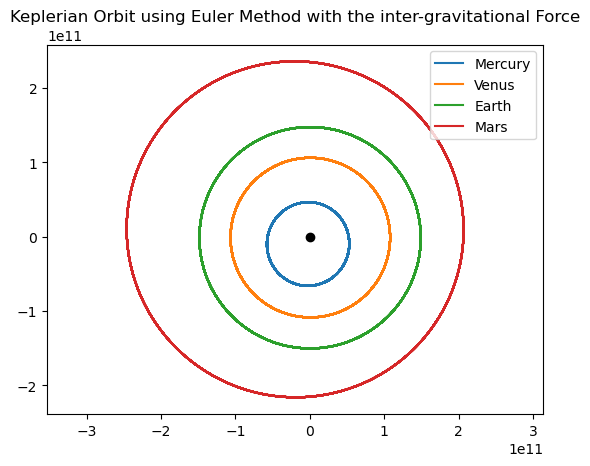

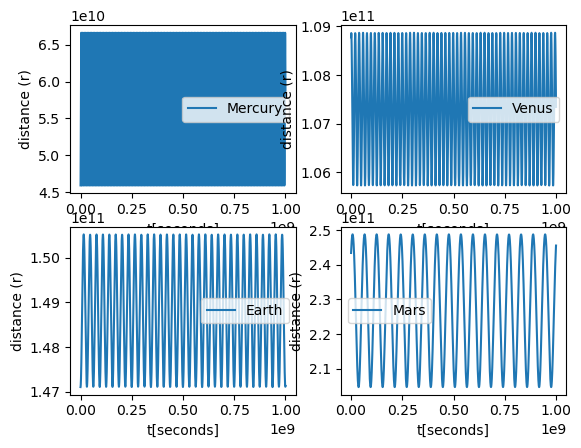

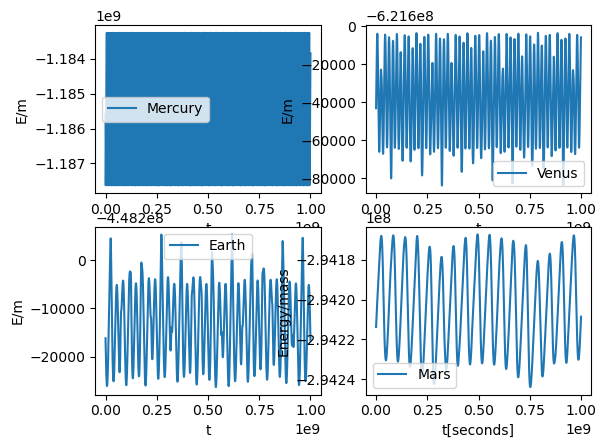

In [1]:
'''
This is the keplerian Potential of first 6 planets including 
the inter-gravitational forces and consists of two asteriods of high eccentricity.

'''
from pylab import *
%matplotlib inline
tau = 1e4
tf = 1e9
to = 0.
N = int(tf/tau)
G=6.67e-11
# read initial values...
x=zeros((4,N)) 
y=zeros((4,N))
vx=zeros((4,N)) 
vy=zeros((4,N))
for i in range(0,4,1):
    data=loadtxt('planetary_data_'+str(i+1)+'.dat')
    x[i][0] = data[0]
    y[i][0] = data[1]
    vx[i][0] = data[3]
    vy[i][0] = data[4]



vx = vx * 1.496e+11/(24*60*60)  # meter/sec
vy = vy * 1.496e+11/(24*60*60)  # meter/sec
x = x * 1.496e+11
y = y * 1.496e+11
t = tau+to
t_plt = array([to])
M_sun=2.0e30 #Kg

M = array([3.2e23,4.8e24,5.9e24,6.4e23])  # all planets masses in Kg....
def Force_x(which_planet,x,y,count): # which_planet is this and x, vx is all planets...
    F=[]
    for i in range(0,4,1):
        if which_planet != i:
            X = x[i][count+1]-x[which_planet][count+1]
            Y = y[i][count+1]-y[which_planet][count+1]
            R = sqrt(X**2+Y**2)
            F.append(-G*M[i]*X/R**3) 
    r = sqrt(x[which_planet][count+1]**2+y[which_planet][count+1]**2)
    return (sum(F)+(-G*M_sun*x[which_planet][count+1]/r**3)) #sum(F)+

def Force_y(which_planet,x,y,count): # which_planet is this and x, vx is all planets...
    F=[]
    for i in range(0,4,1):
        if which_planet != i:
            X = x[i][count+1]-x[which_planet][count+1]
            Y = y[i][count+1]-y[which_planet][count+1]
            R = sqrt(X**2+Y**2)
            F.append(-G*M[i]*Y/R**3) 
    r = sqrt(x[which_planet][count+1]**2+y[which_planet][count+1]**2)
    return (sum(F)+(-G*M_sun*y[which_planet][count+1]/r**3)) #sum(F)+

count = 0
while t<tf:
   # print (count)
    for i in range(0,4,1):
        x[i][count+1] = x[i][count] + vx[i][count]*tau
        y[i][count+1] = y[i][count] + vy[i][count]*tau
        
    for j in range(0,4,1):
        vx[j][count+1] = vx[j][count] + Force_x(j,x,y,count) *tau
        vy[j][count+1] = vy[j][count] + Force_y(j,x,y,count)* tau
    t_plt = append(t_plt,t)
    count+=1
    t=tau+t 


figure()
plot(x[0],y[0],label='Mercury')
plot(x[1],y[1],label='Venus')
plot(x[2],y[2],label='Earth')
plot(x[3],y[3],label='Mars')
title('Keplerian Orbit using Euler Method with the inter-gravitational Force')

legend()
centerx = 0.    # plot the position of the center of mass
centery = 0.
plot(centerx,centery,'ko')
axis('equal')   # make axis scales equal so circular orbits look circular


figure()
subplot(221)
R_mer = sqrt(x[0]**2+y[0]**2)
plot(t_plt,R_mer,label='Mercury')
legend()
xlabel('t[seconds]')
ylabel('distance (r)')


subplot(222)
R_venus = sqrt(x[1]**2+y[1]**2)
plot(t_plt,R_venus,label='Venus')
legend()
xlabel('t[seconds]')
ylabel('distance (r)')
subplot(223)
R_ear = sqrt(x[2]**2+y[2]**2)
plot(t_plt,R_ear,label='Earth')
legend()
xlabel('t[seconds]')
ylabel('distance (r)')
subplot(224)
R_mar = sqrt(x[3]**2+y[3]**2)
plot(t_plt,R_mar,label='Mars')
legend()
xlabel('t[seconds]')
ylabel('distance (r)')
#print (len(t_plt), len(vx[0]), len(x[0]))
## Plot the energy
figure()
subplot(221)
plot(t_plt,(0.5*(vx[0]**2 + vy[0]**2) - G*M_sun/sqrt(x[0]**2 + y[0]**2)), label='Mercury')
legend()
xlabel('t')
ylabel('E/m')
subplot(222)
plot(t_plt,(0.5*(vx[1]**2 + vy[1]**2) - G*M_sun/sqrt(x[1]**2 + y[1]**2)), label='Venus')
legend()
xlabel('t')
ylabel('E/m')
subplot(223)
plot(t_plt,(0.5*(vx[2]**2 + vy[2]**2) - G*M_sun/sqrt(x[2]**2 + y[2]**2)), label='Earth')
legend()
xlabel('t')
ylabel('E/m')
subplot(224)
plot(t_plt,(0.5*(vx[3]**2 + vy[3]**2) - G*M_sun/sqrt(x[3]**2 + y[3]**2)), label='Mars')
legend()
xlabel('t[seconds]')
ylabel('Energy/mass')
show()

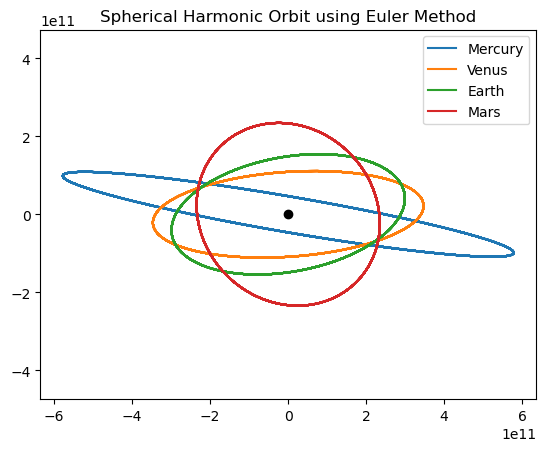

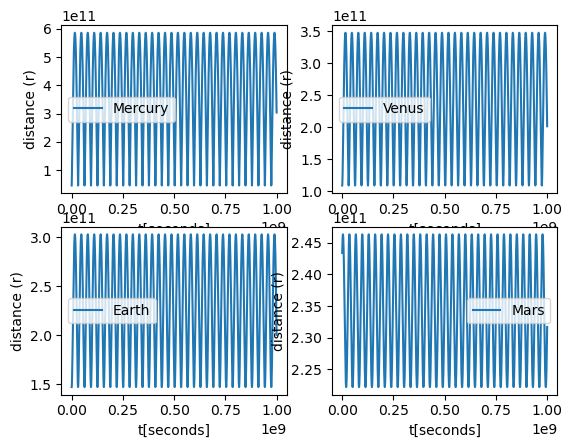

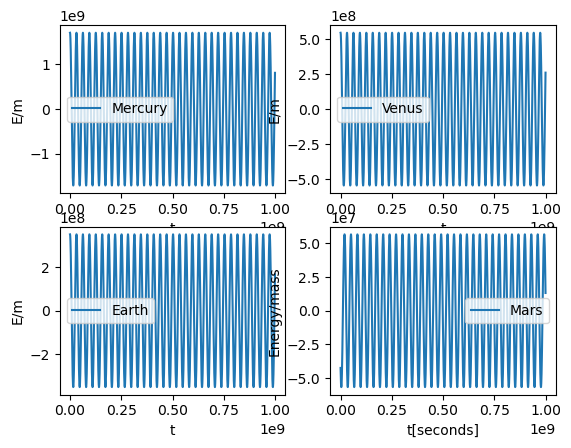

In [4]:
'''
This is the Spherical Harmonic Potential of first 6 planets including 
the inter-gravitational forces and consists of two asteriods of high eccentricity.

'''
from pylab import *
%matplotlib inline
tau = 1e5
tf = 1e9
to = 0.
N = int(tf/tau)
G=6.67e-11
# read initial values...
x=zeros((4,N)) 
y=zeros((4,N))
vx=zeros((4,N)) 
vy=zeros((4,N))
for i in range(0,4,1):
    data=loadtxt('planetary_data_'+str(i+1)+'.dat')
    x[i][0] = data[0]
    y[i][0] = data[1]
    vx[i][0] = data[3]
    vy[i][0] = data[4]



vx = vx * 1.496e+11/(24*60*60)  # meter/sec
vy = vy * 1.496e+11/(24*60*60)  # meter/sec
x = x * 1.496e+11
y = y * 1.496e+11
t = tau+to
t_plt = array([to])
M_sun=2.0e30 #Kg
M = array([3.2e23,4.8e24,5.9e24,6.4e23])  # all planets masses in Kg....

rho_o = 9.0e70
omega_2 = 1e-14#4*pi*G*rho_o/3.0

def Force_x(which_planet,x,y,count): # which_planet is this and x, vx is all planets...

    return ((-omega_2*x[which_planet][count+1])) #sum(F)+

def Force_y(which_planet,x,y,count): # which_planet is this and x, vx is all planets...

    return ((-omega_2*y[which_planet][count+1])) #sum(F)+

count = 0
while t<tf:
   # print (count)
    for i in range(0,4,1):
        x[i][count+1] = x[i][count] + vx[i][count]*tau
        y[i][count+1] = y[i][count] + vy[i][count]*tau
        
    for j in range(0,4,1):
        vx[j][count+1] = vx[j][count] + Force_x(j,x,y,count) *tau
        vy[j][count+1] = vy[j][count] + Force_y(j,x,y,count)* tau
    t_plt = append(t_plt,t)
    count+=1
    t=tau+t 


figure()
plot(x[0],y[0],label='Mercury')
plot(x[1],y[1],label='Venus')
plot(x[2],y[2],label='Earth')
plot(x[3],y[3],label='Mars')
title('Spherical Harmonic Orbit using Euler Method')

legend()
centerx = 0.    # plot the position of the center of mass
centery = 0.
plot(centerx,centery,'ko')
axis('equal')   # make axis scales equal so circular orbits look circular


figure()
subplot(221)
R_mer = sqrt(x[0]**2+y[0]**2)
plot(t_plt,R_mer,label='Mercury')
legend()
xlabel('t[seconds]')
ylabel('distance (r)')


subplot(222)
R_venus = sqrt(x[1]**2+y[1]**2)
plot(t_plt,R_venus,label='Venus')
legend()
xlabel('t[seconds]')
ylabel('distance (r)')
subplot(223)
R_ear = sqrt(x[2]**2+y[2]**2)
plot(t_plt,R_ear,label='Earth')
legend()
xlabel('t[seconds]')
ylabel('distance (r)')
subplot(224)
R_mar = sqrt(x[3]**2+y[3]**2)
plot(t_plt,R_mar,label='Mars')
legend()
xlabel('t[seconds]')
ylabel('distance (r)')
#print (len(t_plt), len(vx[0]), len(x[0]))
## Plot the energy
figure()
subplot(221)
plot(t_plt,(0.5*(vx[0]**2 + vy[0]**2) - 0.5*omega_2*(x[0]**2 + y[0]**2)), label='Mercury')
legend()
xlabel('t')
ylabel('E/m')
subplot(222)
plot(t_plt,(0.5*(vx[1]**2 + vy[1]**2) - 0.5*omega_2*(x[1]**2 + y[1]**2)), label='Venus')
legend()
xlabel('t')
ylabel('E/m')
subplot(223)
plot(t_plt,(0.5*(vx[2]**2 + vy[2]**2) - 0.5*omega_2*(x[2]**2 + y[2]**2)), label='Earth')
legend()
xlabel('t')
ylabel('E/m')
subplot(224)
plot(t_plt,(0.5*(vx[3]**2 + vy[3]**2) - 0.5*omega_2*(x[3]**2 + y[3]**2)), label='Mars')
legend()
xlabel('t[seconds]')
ylabel('Energy/mass')
show()

scale length e.g: 0-100: 0.1


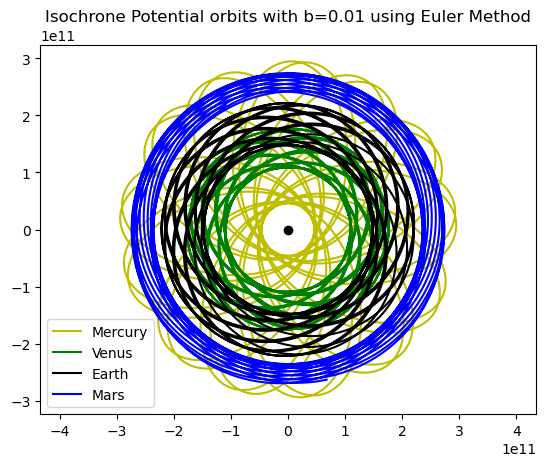

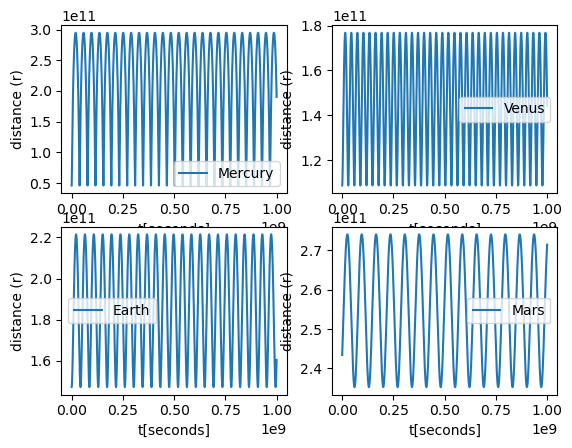

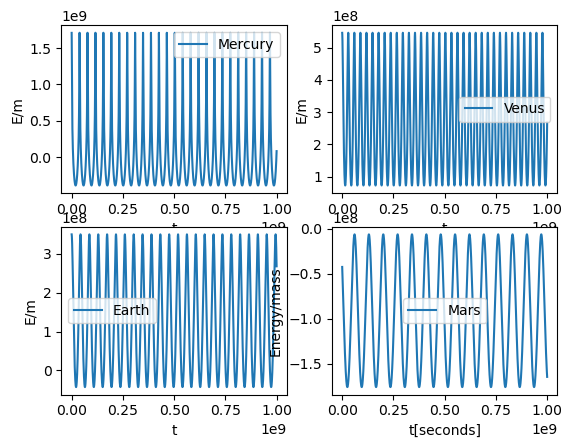

In [10]:
'''
This is the Isochrone Potential of first 6 planets

'''
from pylab import *
%matplotlib inline
tau = 5e4
tf = 1e9#3e8
to = 0.
N = int(tf/tau)
G=6.67e-11
# read initial values...
x=zeros((4,N)) 
y=zeros((4,N))
vx=zeros((4,N)) 
vy=zeros((4,N))
for i in range(0,4,1):
    data=loadtxt('planetary_data_'+str(i+1)+'.dat')
    x[i][0] = data[0]
    y[i][0] = data[1]
    vx[i][0] = data[3]
    vy[i][0] = data[4]



vx = vx * 1.496e+11/(24*60*60)  # meter/sec
vy = vy * 1.496e+11/(24*60*60)  # meter/sec
x = x * 1.496e+11
y = y * 1.496e+11
t = tau+to
t_plt = array([to])
M_sun=2.0e30 #Kg

b=float(input("scale length e.g: 0-100: "))
b = b * 1.496e+11



def Force_x(which_planet,x,y,count): # which_planet is this and x, vx is all planets...
    r2 =  (x[which_planet][count+1])**2 + (y[which_planet][count+1])**2
    return (-G*M_sun*x[which_planet][count+1]/(sqrt(r2+b**2)*(sqrt(r2+b**2)+b)**2))

def Force_y(which_planet,x,y,count): # which_planet is this and x, vx is all planets...
    r2 =  (x[which_planet][count+1])**2 + (y[which_planet][count+1])**2
    return (-G*M_sun*y[which_planet][count+1]/(sqrt(r2+b**2)*(sqrt(r2+b**2)+b)**2))

count = 0
while t<tf:
   # print (count)
    for i in range(0,4,1):
        x[i][count+1] = x[i][count] + vx[i][count]*tau
        y[i][count+1] = y[i][count] + vy[i][count]*tau
        
    for j in range(0,4,1):
        vx[j][count+1] = vx[j][count] + Force_x(j,x,y,count) *tau
        vy[j][count+1] = vy[j][count] + Force_y(j,x,y,count)* tau
    t_plt = append(t_plt,t)
    count+=1
    t=tau+t 


figure()
plot(x[0],y[0],'y-',label='Mercury')
plot(x[1],y[1],'g-',label='Venus')
plot(x[2],y[2],'k-',label='Earth')
plot(x[3],y[3],'b-',label='Mars')
title('Isochrone Potential orbits with b=0.01 using Euler Method')

legend()
centerx = 0.    # plot the position of the center of mass
centery = 0.
plot(centerx,centery,'ko')
axis('equal')   # make axis scales equal so circular orbits look circular


figure()
subplot(221)
R_mer = sqrt(x[0]**2+y[0]**2)
plot(t_plt,R_mer,label='Mercury')
legend()
xlabel('t[seconds]')
ylabel('distance (r)')


subplot(222)
R_venus = sqrt(x[1]**2+y[1]**2)
plot(t_plt,R_venus,label='Venus')
legend()
xlabel('t[seconds]')
ylabel('distance (r)')
subplot(223)
R_ear = sqrt(x[2]**2+y[2]**2)
plot(t_plt,R_ear,label='Earth')
legend()
xlabel('t[seconds]')
ylabel('distance (r)')
subplot(224)
R_mar = sqrt(x[3]**2+y[3]**2)
plot(t_plt,R_mar,label='Mars')
legend()
xlabel('t[seconds]')
ylabel('distance (r)')
#print (len(t_plt), len(vx[0]), len(x[0]))
## Plot the energy
figure()
subplot(221)
plot(t_plt,(0.5*(vx[0]**2 + vy[0]**2) - 0.5*omega_2*(x[0]**2 + y[0]**2)), label='Mercury')
legend()
xlabel('t')
ylabel('E/m')
subplot(222)
plot(t_plt,(0.5*(vx[1]**2 + vy[1]**2) - 0.5*omega_2*(x[1]**2 + y[1]**2)), label='Venus')
legend()
xlabel('t')
ylabel('E/m')
subplot(223)
plot(t_plt,(0.5*(vx[2]**2 + vy[2]**2) - 0.5*omega_2*(x[2]**2 + y[2]**2)), label='Earth')
legend()
xlabel('t')
ylabel('E/m')
subplot(224)
plot(t_plt,(0.5*(vx[3]**2 + vy[3]**2) - 0.5*omega_2*(x[3]**2 + y[3]**2)), label='Mars')
legend()
xlabel('t[seconds]')
ylabel('Energy/mass')
show()

Text(0.5, 1.0, 'Keplerian Orbit of Earth in Spherical Coordinate')

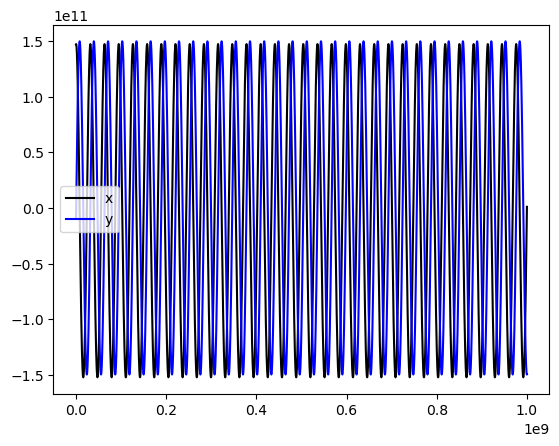

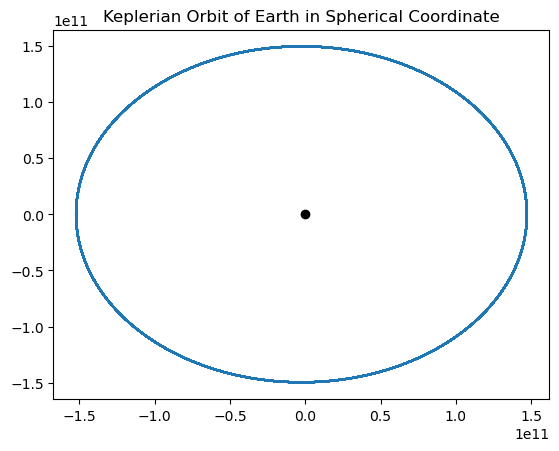

In [11]:
from pylab import *
%matplotlib inline
from math import *
'''
This code is the keplerian potential using spherical coordinate
'''
'''Inputs'''
a = 1.496e11 # semimajor axis [meter]
e = 0.0167086# eccentricity [0:1]
w = radians(288.1)# argument of periapsis [rad]
omega = radians(174.9)# longitude of ascending node [rad]
i = radians(7.155)# inclination [rad]
Mo = radians(355.53)# mean anomaly [rad]
G = 6.67e-11
M_sun = 2e30
mu = G*M_sun# mu=G*M

tf = 1e9 # seconds
t = 0.0
tau = 1e5

E_old = Mo  # initially mean anomaly equal to eccentric anomaly
# outputs
t_plt = array([to])
ox_plt = []
oy_plt = []
x,y=[],[]
while t<tf:
    delta_t = tau
    M_t = Mo + delta_t*(sqrt(mu/a**3))  # new step of mean anomaly
    E_new = E_old - (E_old - e*sin(E_old)-M_t)/(1-e*cos(E_old)) # new step of eccentric anomaly
    v_t = 2*arctan(sqrt(1+e)/sqrt(1-e) * tan(E_new/2)) # true anomaly
    rc_t = a* (1-e*cos(E_new)) # distance to central body (Sun)
    ox_t = rc_t * cos(v_t) # x position in Orbital frame
    oy_t = rc_t * sin(v_t) # y position in Orbital frame
    ox_dot_t = sqrt(mu*a)/rc_t * (-sin(E_new)) # x velocity in Orbital frame 
    oy_dot_t = sqrt(mu*a)/rc_t * (sqrt(1-e**2) * cos(E_new)) # y velocity in Orbital frame
    x.append(rc_t*cos(v_t)) # x and y components
    y.append(rc_t*sin(v_t))
    t_plt = append(t_plt,t)
    ox_plt.append(ox_t)
    oy_plt.append(oy_t)
    t = t+tau
    Mo = M_t
    E_old = E_new

plot(t_plt[1:], ox_plt,'k-',label='x')
plot(t_plt[1:], oy_plt,'b-',label='y')
legend()
figure()
plot(0.0,0.0,'ko')
plot(ox_plt,oy_plt)
title('Keplerian Orbit of Earth in Spherical Coordinate')

Tube orbit in axisymmetric potential: flattened logarithmic potential..
see the input real values from http://gala.adrian.pw/en/latest/dynamics/actionangle.html#transforming-to-actions-angles-and-frequencies 
Initial radius: 1.01.0
Initial tangential velocity: 0.50.5
Enter final time: 5050
Enter time step: 0.010.001


Text(0, 0.5, 'Velocity')

<Figure size 800x600 with 0 Axes>

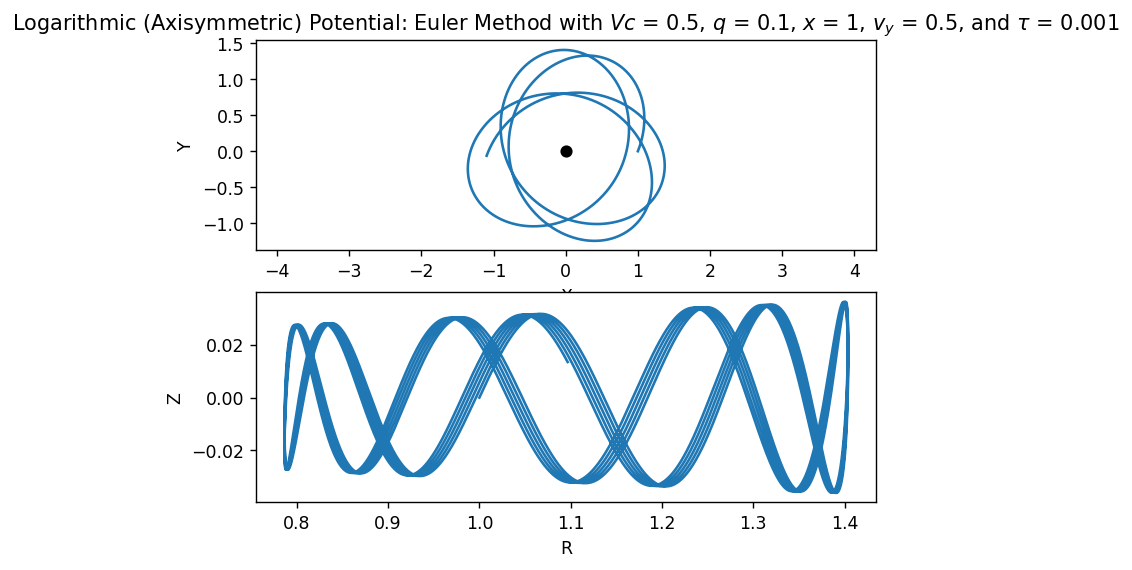

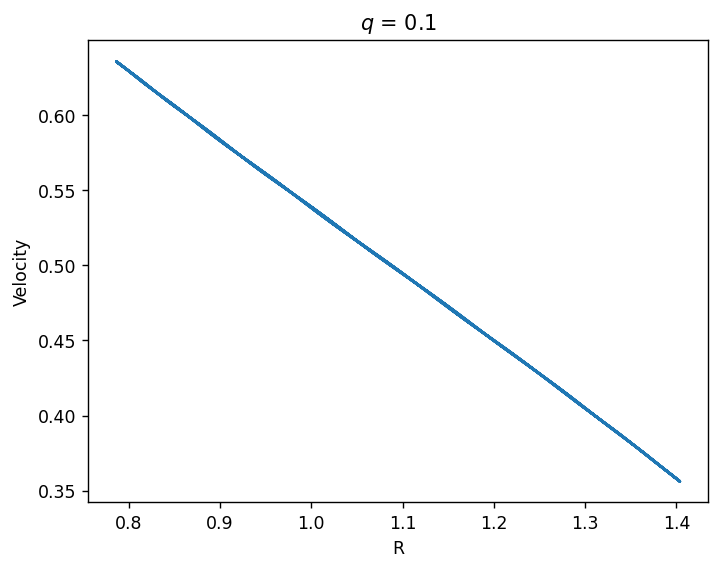

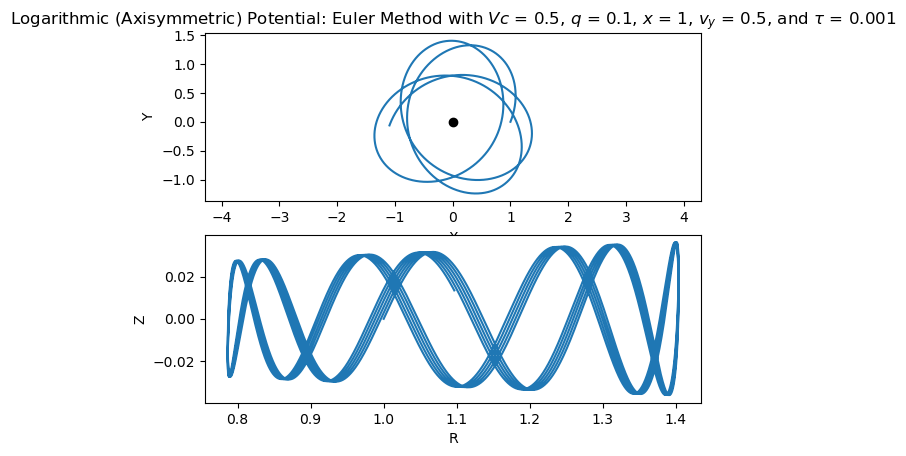

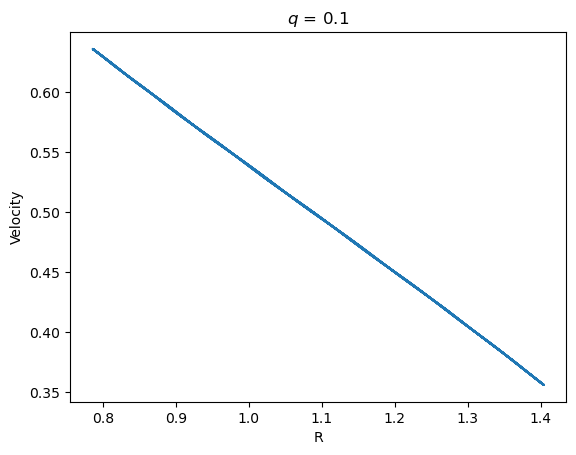

In [15]:
print ('Tube orbit in axisymmetric potential: flattened logarithmic potential..')
print ('see the input real values from http://gala.adrian.pw/en/latest/dynamics/actionangle.html#transforming-to-actions-angles-and-frequencies ')

from pylab import *
%matplotlib inline


# prompt user for initial conditions and times
x0 = float(input('Initial radius: 1.0'))
vy0 = float(input('Initial tangential velocity: 0.5'))
y0 = 0.0
vx0 = 0.2 
z0 = 0.0
vz0 = 0.15
t0 = 0.
tf = float(input("Enter final time: 50"))
tau = float(input("Enter time step: 0.001"))
## Create arrays needed to store the results for plotting
x_plt = array([x0])
y_plt = array([y0])
z_plt = array([z0])
vx_plt = array([vx0])
vy_plt = array([vy0])
vz_plt = array([vz0])
t_plt = array([t0])
## Execute Euler method
# set starting points for iteration to initial conditions
x_old = x0	
y_old = y0
z_old = z0
vx = vx0
vy = vy0
vz = vz0
t = t0	# set starting time to 0

vc = 0.5 
rh=0.0

q = 0.1
figure()
clf()
while (float(t) < float(tf)):
    x = x_old + vx*tau        # implement Euler step
    y = y_old + vy*tau
    z = z_old + vz*tau
    r = sqrt(x**2 + y**2)

    vx_new = vx - tau*(1.0/2 * vc**2 * 2*x/(x**2+y**2+(z/q)**2+rh**2))
    vy_new = vy - tau*(1.0/2 * vc**2 * 2*y/(x**2+y**2+(z/q)**2+rh**2))
    vz_new = vz - tau*(1.0/2 * vc**2 * 2*z/(q**2*(x**2+y**2+(z/q)**2+rh**2)))

    x_plt = append(x_plt,x)   # Append new points to the arrays
    y_plt = append(y_plt,y)
    z_plt = append(z_plt,z)
    vx_plt = append(vx_plt,vx_new)
    vy_plt = append(vy_plt,vy_new)
    vz_plt = append(vz_plt,vz_new)
    t_plt = append(t_plt,t)
  #  ang_mom = append(ang_mom,l)
    x_old = x    # Update x_old and y_old for next Euler step
    y_old = y
    z_old = z
    vx = vx_new
    vy = vy_new
    vz = vz_new
    t = t + tau  # Increment time



R = sqrt(x_plt**2+y_plt**2)
## Plot the results


# Plot the orbit
subplot(211) # subplot() lets you put 
               # multiple plots on a single page

title(r'Logarithmic (Axisymmetric) Potential: Euler Method with $Vc$ = %g, $q$ = %g, $x$ = %g, $v_y$ = %g, and $\tau$ = %g' \
      % (vc,q,x0,vy0,tau))
plot(x_plt,y_plt)
centerx = 0.    # plot the position of the center of mass
centery = 0.
plot(centerx,centery,'ko')
axis('equal')   # make axis scales equal so circular orbits look circular
xlabel('X')
ylabel('Y')

subplot(212)
plot(R,z_plt)
xlabel('R')
ylabel('Z')
#ylim(-1,1)

figure()
title(r'$q$ = %g' % (q))
V = sqrt(vx_plt**2+vy_plt**2)
plot(R, V)
xlabel('R')
ylabel('Velocity')


Razor-thin disk: Kuzmin Model
Initial radius: 11
Initial tangential velocity: 88
Enter final time: 1010
Enter time step: 0.0010.001


Text(0, 0.5, 'Z')

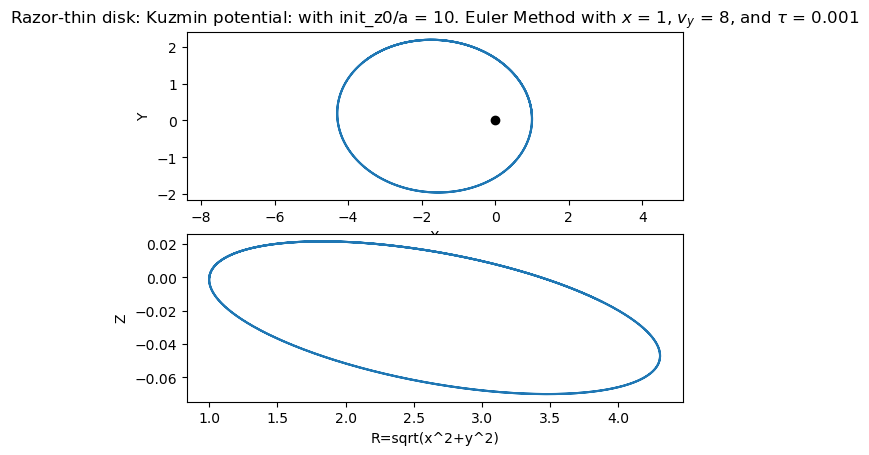

In [16]:
print ('Razor-thin disk: Kuzmin Model')

from pylab import *
%matplotlib inline

G = 4*pi**2

M = 1.

# prompt user for initial conditions and times
x0 = float(input('Initial radius: 1'))
vy0 = float(input('Initial tangential velocity: 8'))
y0 = 0.#1.0
vx0 = 0.2#.2 
z0 = 0.#0.1
vz0 = 0.15#.2
t0 = 0.
tf = float(input("Enter final time: 10"))
tau = float(input("Enter time step: 0.001"))
## Create arrays needed to store the results for plotting
x_plt = array([x0])
y_plt = array([y0])
z_plt = array([z0])
vx_plt = array([vx0])
vy_plt = array([vy0])
vz_plt = array([vz0])
t_plt = array([t0])
## Execute Euler method
# set starting points for iteration to initial conditions
x_old = x0	
y_old = y0
z_old = z0
vx = vx0
vy = vy0
vz = vz0
t = t0	# set starting time to 0

a = 0.01

while (float(t) < float(tf)):
    x = x_old + vx*tau        # implement Euler step
    y = y_old + vy*tau
    z = z_old + vz*tau
    r = sqrt(x**2 + y**2)

    vx_new = vx - tau*(  (G*M*x)/((r**2 + ((z)+a)**2)**1.5)) 
    vy_new = vy - tau*(  (G*M*y)/((r**2 + ((z)+a)**2)**1.5) )
    vz_new = vz - tau*((G*M*((z)+a))/((((z)+a)**2 + r**2  )**1.5))

    x_plt = append(x_plt,x)   # Append new points to the arrays
    y_plt = append(y_plt,y)
    z_plt = append(z_plt,z)
    vx_plt = append(vx_plt,vx_new)
    vy_plt = append(vy_plt,vy_new)
    vz_plt = append(vz_plt,vz_new)
    t_plt = append(t_plt,t)
  #  ang_mom = append(ang_mom,l)
    x_old = x    # Update x_old and y_old for next Euler step
    y_old = y
    z_old = z
    vx = vx_new
    vy = vy_new
    vz = vz_new
    t = t + tau  # Increment time
    


R = sqrt(x_plt**2+y_plt**2)
## Plot the results
figure(1)
clf()

# Plot the orbit
subplot(2,1,1) # subplot() lets you put 
               # multiple plots on a single page

title(r'Razor-thin disk: Kuzmin potential: with init_z0/a = 10. Euler Method with $x$ = %g, $v_y$ = %g, and $\tau$ = %g' \
      % (x0,vy0,tau))
plot(x_plt,y_plt)
centerx = 0.    # plot the position of the center of mass
centery = 0.
xlabel('X')
ylabel('Y')
plot(centerx,centery,'ko')
axis('equal')   # make axis scales equal so circular orbits look circular

subplot(2,1,2)
plot(R,z_plt)
xlabel('R=sqrt(x^2+y^2)')
ylabel('Z')




# 

Thickened Disk: Miyamoto Nagai Model
Initial radius: 11
Initial tangential velocity: 22
Enter final time: 1010
Enter time step: 0.0010.001


Text(0, 0.5, 'Vx')

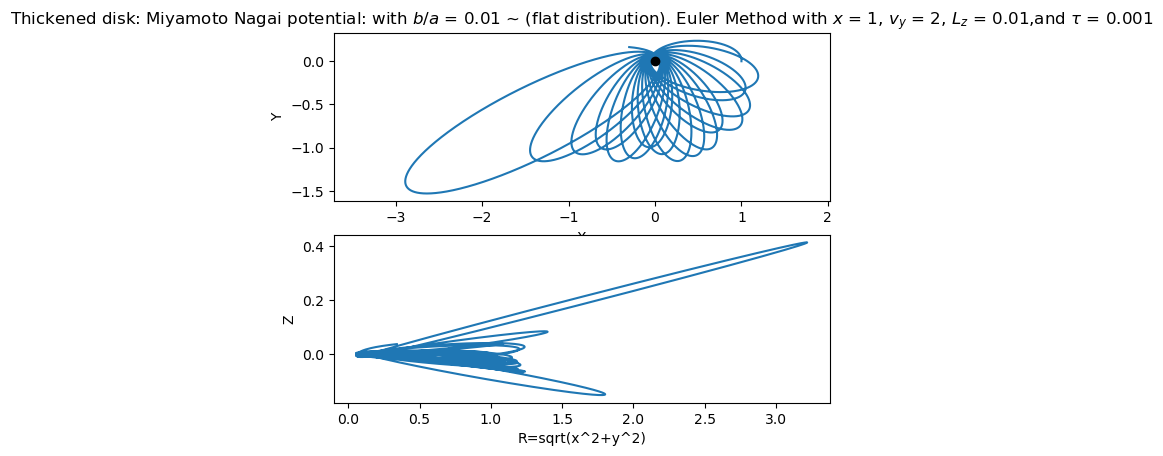

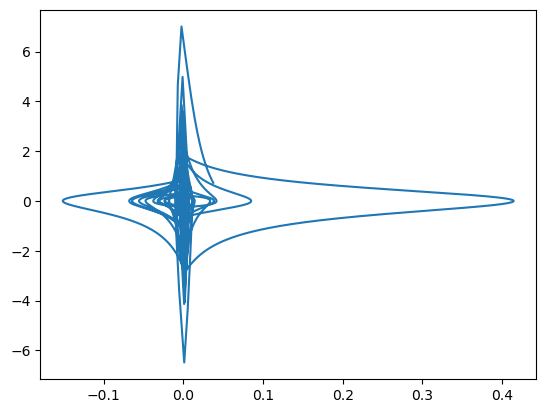

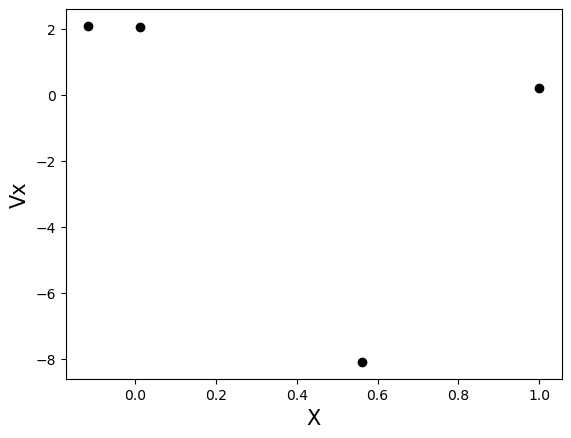

In [23]:
print ('Thickened Disk: Miyamoto Nagai Model')

from pylab import *
%matplotlib inline

G = 4*pi**2

M = 1.

# prompt user for initial conditions and times
x0 = float(input('Initial radius: 1'))
vy0 = float(input('Initial tangential velocity: 2'))
y0 = 0.#1.0
vx0 = 0.2#.2 
z0 = 0.#0.1
vz0 = 0.15#.2
t0 = 0.
tf = float(input("Enter final time: 10"))
tau = float(input("Enter time step: 0.001"))
## Create arrays needed to store the results for plotting
x_plt = array([x0])
y_plt = array([y0])
z_plt = array([z0])
vx_plt = array([vx0])
vy_plt = array([vy0])
vz_plt = array([vz0])
t_plt = array([t0])
## Execute Euler method
# set starting points for iteration to initial conditions
x_old = x0	
y_old = y0
z_old = z0
vx = vx0
vy = vy0
vz = vz0
t = t0	# set starting time to 0

b = .0001
a = 0.01
Lz = 0.01
# or take..
#a = .0001
#b = .01
x_z_0 = array([x0])
y_z_0 = array([y0])
vx_z_0 = array([vx0])
vy_z_0 = array([vy0])

while (float(t) < float(tf)):
    x = x_old + vx*tau        # implement Euler step
    y = y_old + vy*tau
    z = z_old + vz*tau
    r = sqrt(x**2 + y**2)

    vx_new = vx + tau* (-G*M*x / ((x**2+y**2+(sqrt(z**2+b**2)+a)**2)**(3./2) ) + Lz**2/(sqrt(x**2+y**2))**3.)
    vy_new = vy + tau* (-G*M*y / ((x**2+y**2+(sqrt(z**2+b**2)+a)**2)**(3./2) ) + Lz**2/(sqrt(x**2+y**2))**3.)
    vz_new = vz - tau* (G*M*z*(sqrt(z**2+b**2)+a) )/ ( sqrt(z**2+b**2) * ((sqrt(z**2+b**2)+a)**2 + x**2+y**2)**(3./2)             )
    if z <= +0.00001 and z >= -0.00001:
       # print ('z=0 condition')
        x_z_0 = append(x_z_0,x)
        y_z_0 = append(y_z_0,y)
        vx_z_0 = append(vx_z_0,vx_new)
        vy_z_0 = append(vy_z_0,vy_new)
        
    x_plt = append(x_plt,x)   # Append new points to the arrays
    y_plt = append(y_plt,y)
    z_plt = append(z_plt,z)
    vx_plt = append(vx_plt,vx_new)
    vy_plt = append(vy_plt,vy_new)
    vz_plt = append(vz_plt,vz_new)
    t_plt = append(t_plt,t)
  #  ang_mom = append(ang_mom,l)
    x_old = x    # Update x_old and y_old for next Euler step
    y_old = y
    z_old = z
    vx = vx_new
    vy = vy_new
    vz = vz_new
    t = t + tau  # Increment time
    


R = sqrt(x_plt**2+y_plt**2)
## Plot the results
figure(1)
clf()

# Plot the orbit
subplot(2,1,1) # subplot() lets you put 
               # multiple plots on a single page

title(r'Thickened disk: Miyamoto Nagai potential: with $b/a$ = %g ~ (flat distribution). Euler Method with $x$ = %g, $v_y$ = %g, $L_{z}$ = %g,and $\tau$ = %g' \
      % (b/a,x0,vy0,Lz,tau))
plot(x_plt,y_plt)
centerx = 0.    # plot the position of the center of mass
centery = 0.
xlabel('X')
ylabel('Y')
plot(centerx,centery,'ko')
axis('equal')   # make axis scales equal so circular orbits look circular

subplot(2,1,2)
plot(R,z_plt)
xlabel('R=sqrt(x^2+y^2)')

ylabel('Z')

figure()
plot(z_plt, vz_plt)

figure()
R_z_0 = sqrt(x_z_0**2+y_z_0**2)
v_z_0 = sqrt(vx_z_0**2+vy_z_0**2)
plot(x_z_0, vx_z_0,'ko')
xlabel('X',fontsize=15)
ylabel('Vx',fontsize=15)
#plot(y_z_0, vy_z_0,'bo')

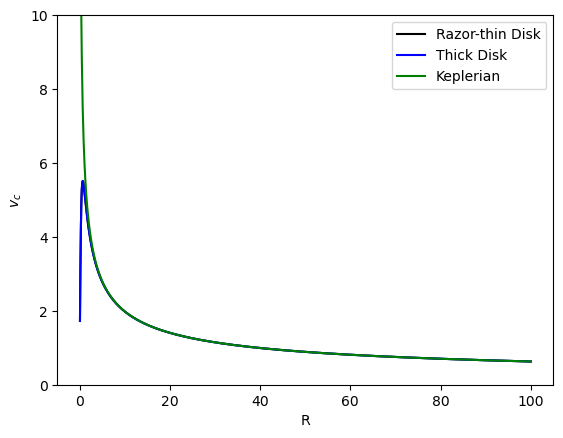

In [26]:
'''                  Velocity Profile for Kepler, Thinkdisk and Razor Potentials
'''
R = linspace(0.1,100,1000)
b = 0.0001
a =0.5
G = 4*pi**2
M =1.
v_razor,v_thick,v_kepler = [],[],[]
for i in range(len(R)):
    v_razor.append(sqrt( (G*M*R[i]**2)/(R[i]**2+a**2)**1.5   ))
    v_thick.append(sqrt( (G*M*R[i]**2)/(R[i]**2+(b+a)**2)**1.5   ))
    v_kepler.append(sqrt(  (G*M)/R[i]))

plot(R,v_razor,'k-',label='Razor-thin Disk')
plot(R,v_thick,'b-',label='Thick Disk')
plot(R,v_kepler,'g-',label='Keplerian')
xlabel('R')
ylabel(r'$v_c$')
ylim(0,10)
legend()

Initial x: 0.4.4
Initial vely: 0.1.1
Enter final time: 1010
Enter time step: 0.00050.0005


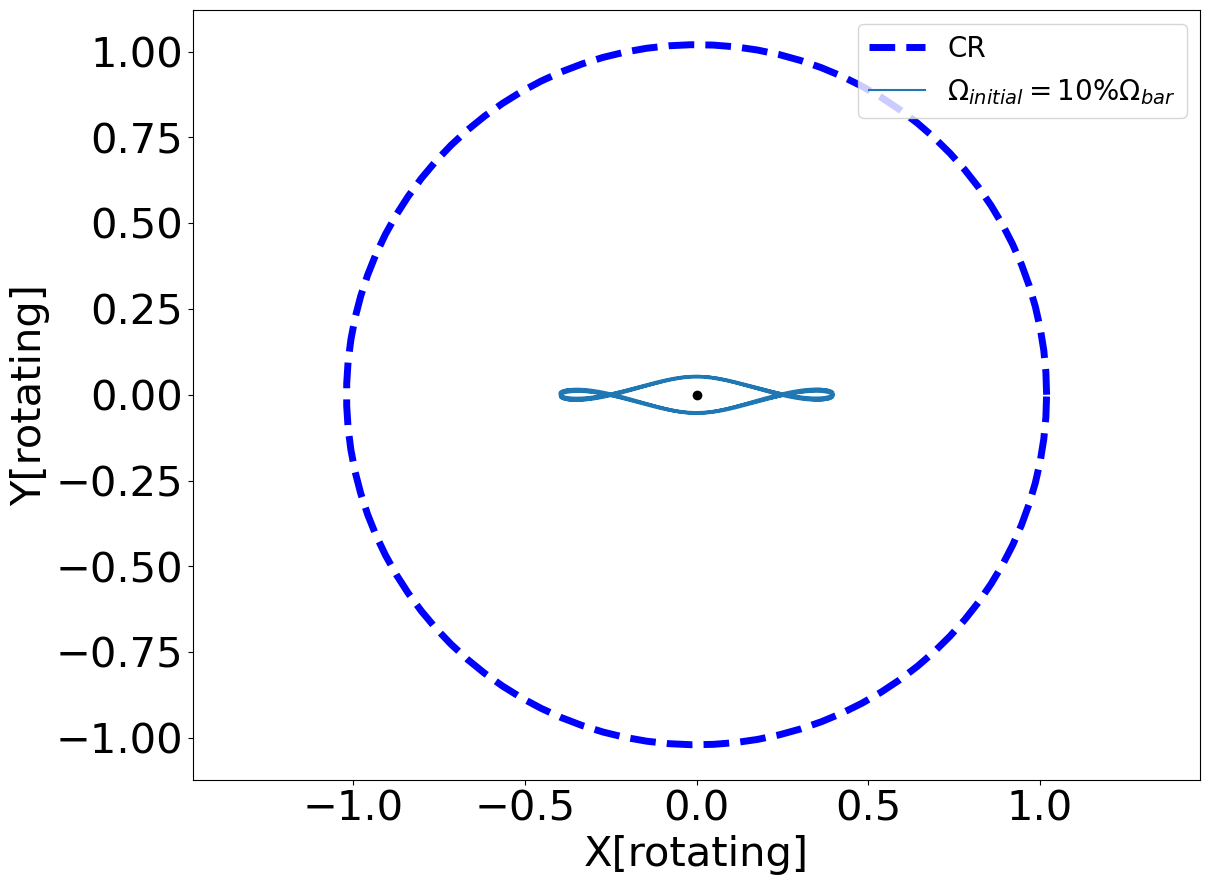

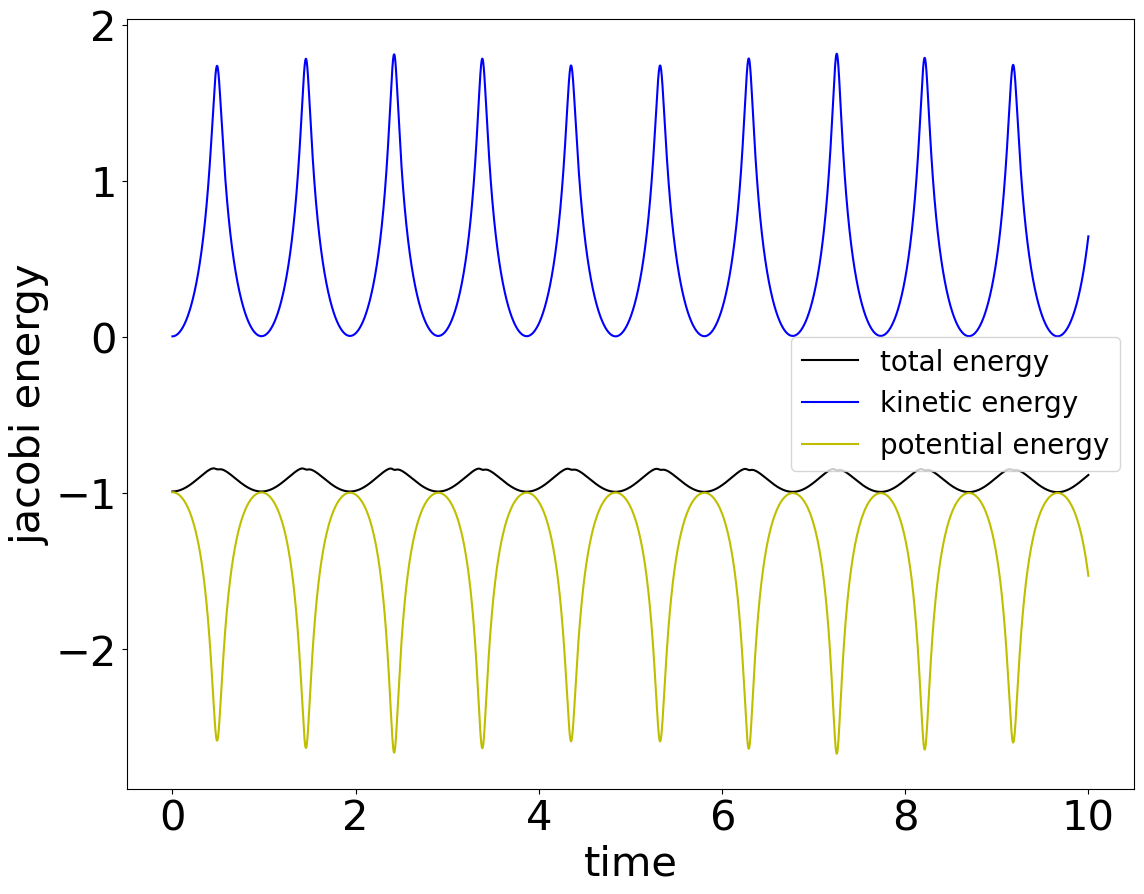

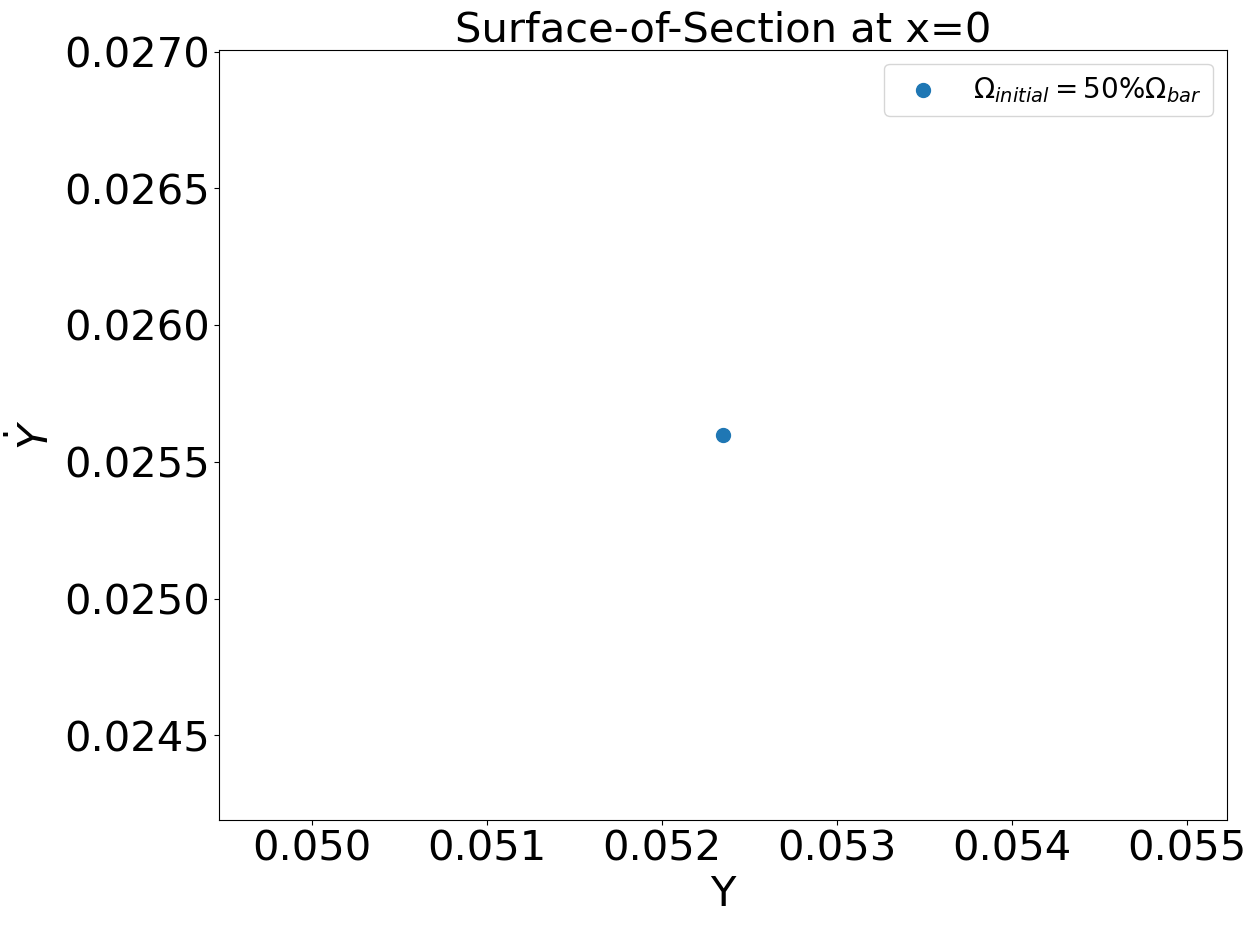

In [28]:

'''
Runge-kutta 4th order: 2D(x-y) Barred galaxies can be approximated to have static potential in a 
frame that rotates at constant rate i.e., pattern speed.
... this code include barred potential and logarthmic potential....
'''
from pylab import *
%matplotlib inline
from scipy.interpolate import interp1d

vc = 1.#1. 
rc=0.03
q = 0.8
omega=1.#1.
e=0.00001

# prompt user for initial conditions and times
x0 = float(input('Initial x: 0.4'))
y0 = 0.#np.float(input('Initial y: '))
r0 =sqrt(x0**2+y0**2)
vy0 = float(input('Initial vely: 0.1'))#sqrt(-omega**2*r0**2 + vc**2/(1+rc**2/r0**2))
vx0 = 0.#sqrt(omega**2*r0**2- vc**2/(1+rc**2/r0**2))

t0 = 0.
tf = float(input("Enter final time: 10"))
tau = float(input("Enter time step: 0.0005"))   # must be 0.0001 - 0.0005.........
## Create arrays needed to store the results for plotting
x_plt = array([x0])
y_plt = array([y0])
vx_plt = array([vx0])
vy_plt = array([vy0])
t_plt = array([t0])
x_inertial_plt = []#array([1])
y_inertial_plt = []#array([1])
E_j = []
eff_pot = []
## Execute Euler method
# set starting points for iteration to initial conditions
x_old = x0	
y_old = y0
vx = vx0
vy = vy0
t = t0	# set starting time to 0

#more define...
x_y_0 = array([x0])
y_x_0 = array([y0])
yy_x_0 = array([y0])
vx_y_0 = array([vx0])
vy_x_0 = array([vy0])
Ej0 = 0
po0=ke0=0
Ej = array([Ej0])
Etotal=array([Ej0])
KE=array([ke0])
PO=array([po0])


def g(t,x,y,vx,vy):
    return ( (( vc**2 * x/(x**2+(y/q)**2+rc**2)) + omega**2*x + 2*(omega*vy) )  + (-(e*((3*cos(2*arctan(y/x))*x+4*y*sin(2*arctan(y/x)))*sqrt(x**2+y**2)-16*cos(2*arctan(y/x))*x-64*y*sin(2*arctan(y/x))))/(2*(x**2+y**2)**(3/4)) )   )


def h(t,x,y,vx,vy):
    return ( ((( vc**2 * y/(q**2*(x**2+(y/q)**2+rc**2))) + omega**2*y - 2*(omega*vx) ) )   + (( (e*((4*x*(y**2+x**2)**(3/2)-64*x*y**2-64*x**3)*sin(2*arctan(y/x))+(16*y**3+sqrt(y**2+x**2)*(-3*y**3-3*x**2*y)+16*x**2*y)*cos(2*arctan(y/x))))/(2*(y**2+x**2)**(7/4)) ) )  )



while (float(t) < float(tf)):
    x = x_old + vx*tau        
    y = y_old + vy*tau
    
    K1_x = g(t,x,y,vx,vy)
    K1_y = h(t,x, y,vx,vy)
    
    K2_x = g(t+tau/2.0, x+K1_x*tau/2.0,y+K1_y*tau/2.0, vx,vy)
    K2_y = h(t+tau/2.0, x+K1_x*tau/2.0,y+K1_y*tau/2.0, vx,vy)
    
    K3_x = g(t+tau/2.0, x+K2_x*tau/2.0,y+K2_y*tau/2.0, vx,vy)
    K3_y = h(t+tau/2.0, x+K2_x*tau/2.0,y+K2_y*tau/2.0, vx,vy)
    
    K4_x = g(t+tau, x+tau*K3_x,y+tau*K3_y, vx,vy)
    K4_y = h(t+tau, x+tau*K3_x,y+tau*K3_y, vx,vy)
    
    vx_new = vx - tau/6.0 * (K1_x+2*K2_x+2*K3_x+K4_x)
    vy_new = vy - tau/6.0 * (K1_y+2*K2_y+2*K3_y+K4_y)
 
    # calculate jacobi energy and effective potential for x and y and then sum up....
    E = 1./2*((vx_new)**2+(vy_new)**2)  + 1./2*vc**2*log(rc**2+x**2+(y**2/q**2)) -1./2 * omega**2 * (x**2+y**2) + e*(x**2+y**2)**0.25*(16-sqrt(x**2+y**2))*cos(2*arctan(y/x))   
    Etotal = append(Etotal,E)
    ke = 1./2*((vx_new)**2+(vy_new)**2)
    KE =append(KE,ke)
    po = + 1./2*vc**2*log(rc**2+x**2+(y**2/q**2)) -1./2 * omega**2 * (x**2+y**2) + e*(x**2+y**2)**0.25*(16-sqrt(x**2+y**2))*cos(2*arctan(y/x))   
    PO =append(PO,po)
    
    if x <= +0.0001 and x >= -0.0001 and vx_new > 0.0:

        y_x_0 = append(y_x_0,y)
        vy_x_0 = append(vy_x_0,vy_new)

    
    x_plt = append(x_plt,x)   # Append new points to the arrays
    y_plt = append(y_plt,y)
    vx_plt = append(vx_plt,vx_new)
    vy_plt = append(vy_plt,vy_new)
    t_plt = append(t_plt,t)

  #  ang_mom = append(ang_mom,l)
    x_old = x    # Update x_old and y_old for next Euler step
    y_old = y
 #   z_old = z
    vx = vx_new
    vy = vy_new
 #   vz = vz_new
    t = t + tau  # Increment time



import matplotlib.pyplot as plt
theta = np.linspace(0, 2*np.pi, 100)

radius = 0.0177

a = radius*np.cos(theta)
b = radius*np.sin(theta)

figure, axes = plt.subplots(1)
figure.set_size_inches(13, 10)
#axes.plot(a, b,'k--',linewidth=5.,label='ILR')
#axes.set_aspect(1)
#*************************
radius = 1.02
a = radius*np.cos(theta)
b = radius*np.sin(theta)
axes.plot(a, b,'b--',linewidth=5.,label='CR')
axes.set_aspect(1)
#*************************
radius = 3.69
a = radius*np.cos(theta)
b = radius*np.sin(theta)
#axes.plot(a, b,'g--',linewidth=5.,label='OLR')
#axes.set_aspect(1)
      
    

'''Plotting Below'''
plot(x_plt,y_plt,label=r'$\Omega_{initial} = 10\% \Omega_{bar}$')
centerx = 0.    # plot the position of the center of mass
centery = 0.

plot(centerx,centery,'ko')
axis('equal')   # make axis scales equal so circular orbits look circular
xlabel('X[rotating]',fontsize=30)
ylabel('Y[rotating]',fontsize=30)
plt.legend(fontsize=20)
axes.tick_params(axis='both',which='major',labelsize=30)

figure, axes = plt.subplots(1)
figure.set_size_inches(13, 10)
plot(t_plt[1:], Etotal[1:],'k-',label='total energy')
plot(t_plt[1:], KE[1:],'b-',label='kinetic energy')
plot(t_plt[1:], PO[1:],'y-',label='potential energy')
xlabel('time',fontsize=30)
ylabel('jacobi energy',fontsize=30)
plt.legend(fontsize=20)
axes.tick_params(axis='both',which='major',labelsize=30)

figure, axes = plt.subplots(1)
figure.set_size_inches(13, 10)
title('Surface-of-Section at x=0',fontsize=30)
scatter(y_x_0[1:], vy_x_0[1:],marker='o',s=100,label=r'$\Omega_{initial} = 50\% \Omega_{bar}$')
xlabel('Y',fontsize=30)
ylabel(r'$\dot{Y}$',fontsize=30)
plt.legend(fontsize=20)
axes.tick_params(axis='both',which='major',labelsize=30)


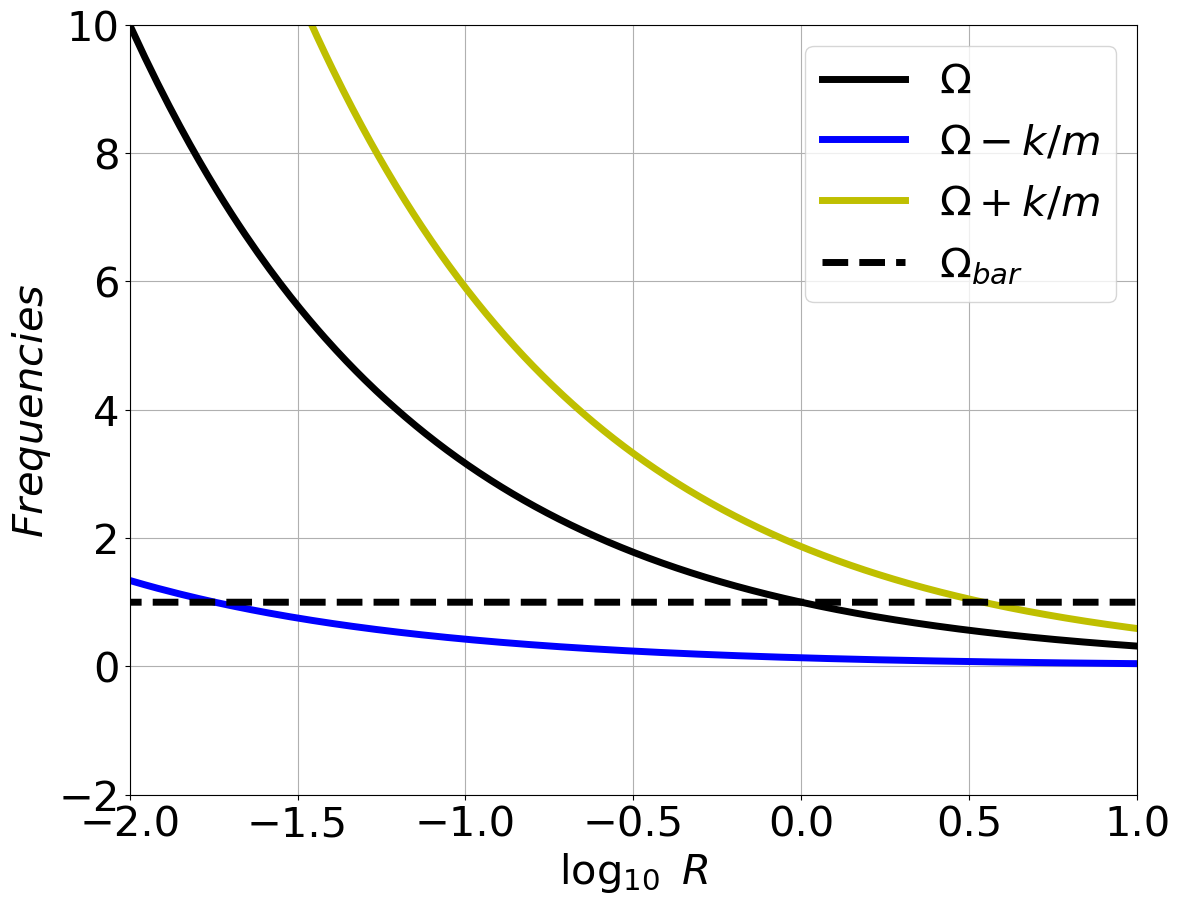

In [29]:
'''                  Velocity-pattern Profile
'''
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

%matplotlib inline


fig, ax1 = plt.subplots()
fig.set_size_inches(13, 10)
r = linspace(0.0001,10,10000)
vc =1.
omega=zeros(10000)+1
w = sqrt(vc/r)
k = sqrt((4*vc-1)/r)

plt.plot(log10(r),(w),'k-',linewidth=5.,label=r'$\Omega$')
plt.plot(log10(r),(w-k/2),'b-',linewidth=5.,label=r'$\Omega - k/m$')
plt.plot(log10(r),(w+k/2),'y-',linewidth=5.,label=r'$\Omega + k/m$')
plt.plot(log10(r),(omega),'k--',linewidth=5.,label=r'$\Omega_{bar}$')

plt.legend(fontsize=30)
ax1.set_ylabel(r'$Frequencies$', fontsize=30)
ax1.set_xlabel(r'$\log_{10}\ R$', fontsize=30)
ax1.tick_params(axis='both',which='major',labelsize=30)
plt.grid()
plt.xlim(-2,1)
plt.ylim(-2,10)
plt.savefig('freq_vs_R.png', dpi=300, bbox_inches='tight')

plt.show() 